## 1. Import What We Need

In [1]:
#import regular functionalities that we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from IPython.display import display

#stats imports
import statsmodels.api as sm
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#classifiers to be used
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble

#Model Selection Bits
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, KFold
from sklearn.model_selection import learning_curve, validation_curve

#preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import mode

#evaluation
from sklearn.metrics import f1_score

#plotting
from sklearn.model_selection import learning_curve, validation_curve

#dataset
from sklearn.datasets import load_digits, make_classification

#pipelines
from sklearn.pipeline import Pipeline

## 2. Read the file

In [4]:
heart_disease_df=pd.read_csv('heart_2020_cleaned.csv')

## 3. Inspect the data (info, describe, head, tail)

In [6]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
#The results above indicate that there are 3 columns of floats (actual scores/decimals).
#The results also indicate that most of the results are 0,1 (No, Yes)

In [8]:
heart_disease_df.describe()

BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000

In [9]:
heart_disease_df.head(10)

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   
5          Yes  28.87     Yes              No     No             6.0   
6           No  21.63      No              No     No            15.0   
7           No  31.64     Yes              No     No             5.0   
8           No  26.45      No              No     No             0.0   
9           No  40.69      No              No     No             0.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race  \
0          30.0          No  Female        55-59  White   
1           0.0          No  Female  80 or older  White   
2          30.0          No    Male        65-69  White   
3           0.0          No  Female        75-79  White   
4           0.0         Yes  Female        40-44  White   
5           0.0         Yes  Female        75-79  Black   
6           0.0          No  Female        70-74  White   
7           0.0         Yes  Female  80 or older  White   
8           0.0          No  Female  80 or older  White   
9           0.0         Yes    Male        65-69  White   

                  Diabetic PhysicalActivity  GenHealth  SleepTime Asthma  \
0                      Yes              Yes  Very good        5.0    Yes   
1                       No              Yes  Very good        7.0     No   
2                      Yes              Yes       Fair        8.0    Yes   
3                       No               No       Good        6.0     No   
4                       No              Yes  Very good        8.0     No   
5                       No               No       Fair       12.0     No   
6                       No              Yes       Fair        4.0    Yes   
7                      Yes               No       Good        9.0    Yes   
8  No, borderline diabetes               No       Fair        5.0     No   
9                       No              Yes       Good       10.0     No   

  KidneyDisease SkinCancer  
0            No        Yes  
1            No         No  
2            No         No  
3            No        Yes  
4            No         No  
5            No         No  
6            No        Yes  
7            No         No  
8           Yes         No  
9            No         No

In [10]:
heart_disease_df.tail(10)

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
319785           No  31.93      No             Yes     No             0.0   
319786          Yes  33.20     Yes              No     No             0.0   
319787           No  36.54      No              No     No             7.0   
319788           No  23.38      No              No     No             0.0   
319789           No  22.22      No              No     No             0.0   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
319785           0.0          No    Male        65-69  Hispanic       No   
319786           0.0          No  Female        60-64  Hispanic      Yes   
319787           0.0          No    Male        30-34  Hispanic       No   
319788           0.0          No  Female        60-64  Hispanic       No   
319789           0.0          No  Female        18-24  Hispanic       No   
319790           0.0         Yes    Male        60-64  Hispanic      Yes   
319791           0.0          No    Male        35-39  Hispanic       No   
319792           0.0          No  Female        45-49  Hispanic       No   
319793           0.0          No  Female        25-29  Hispanic       No   
319794           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
319785              Yes       Good        7.0     No            No         No  
319786              Yes  Very good        8.0    Yes            No         No  
319787               No       Good        9.0     No            No         No  
319788              Yes  Excellent        6.0     No            No         No  
319789              Yes  Excellent        8.0     No            No         No  
319790               No       Fair        6.0    Yes            No         No  
319791              Yes  Very good        5.0    Yes            No         No  
319792              Yes       Good        6.0     No            No         No  
319793               No       Good       12.0     No            No         No  
319794              Yes       Good        8.0     No            No         No

## 4. Clean the Data

In [12]:
heart_disease_df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [13]:
#There are no blanks in the data

In [14]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## 5. Plots

In [16]:
# Tabulate the counts of 'Yes' and 'No' in the 'HeartDisease' column
heart_disease_counts = heart_disease_df['HeartDisease'].value_counts()

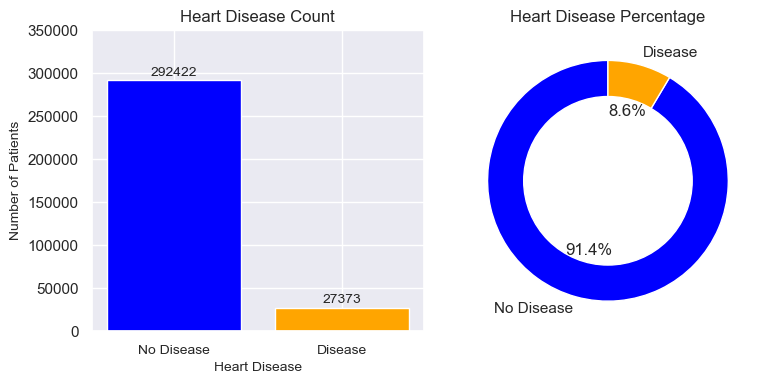

In [17]:
# Calculate total patients
total_patients = heart_disease_counts.sum()

# Compute percentages
percentages = (heart_disease_counts / total_patients) * 100

# Labels and colors
labels = ['No Disease', 'Disease']
colors = ['blue', 'orange']

# We will be creating side-by-side plots (bar chart & donut chart)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))  # 8 width, 4 height

## Create the Bar Chart ##
ax1.bar(heart_disease_counts.index, heart_disease_counts.values, color=colors)
ax1.set_title('Heart Disease Count', fontsize=12)
ax1.set_xlabel('Heart Disease', fontsize=10)
ax1.set_ylabel('Number of Patients', fontsize=10)
ax1.set_xticks([0, 1])  
ax1.set_xticklabels(['No Disease', 'Disease'], fontsize=10)
ax1.set_ylim(0, 350000)  # Extend y-axis to 350,000

# Display values on top of bars
for i, value in enumerate(heart_disease_counts.values):
    ax1.text(i, value + 5000, str(value), ha='center', fontsize=10)

## Create the Donut Chart ##
ax2.pie(percentages, labels=labels, colors=colors, autopct='%.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})
ax2.set_title('Heart Disease Percentage', fontsize=12)

# Add a circle to make it a donut
center_circle = plt.Circle((0, 0), 0.70, fc='white')
ax2.add_artist(center_circle)

# Adjust spacing between subplots
plt.tight_layout()

# Show plots
plt.show()

In [18]:
# Smoking counts
smoking_counts = heart_disease_df['Smoking'].value_counts()

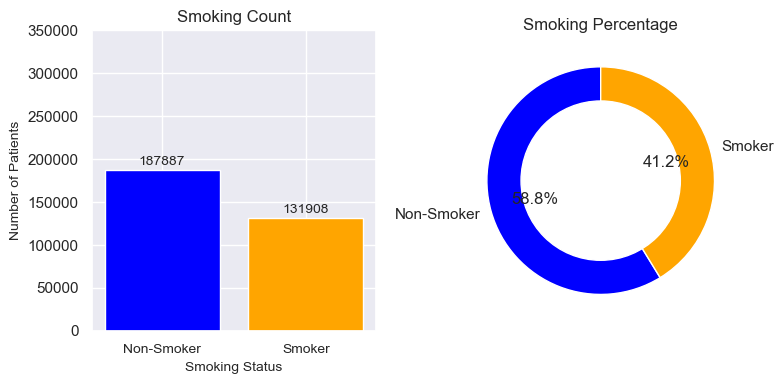

In [19]:
# Ensure order: No (Non-Smoker) first, Yes (Smoker) second
smoking_counts = smoking_counts.reindex(['No', 'Yes'])

# Calculate total patients
total_patients = smoking_counts.sum()

# Compute percentages
percentages = (smoking_counts / total_patients) * 100

# Labels and colors
labels = ['Non-Smoker', 'Smoker']
colors = ['blue', 'orange']

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))  # 8 width, 4 height

## ---- BAR CHART ---- ##
ax1.bar(smoking_counts.index, smoking_counts.values, color=colors)
ax1.set_title('Smoking Count', fontsize=12)
ax1.set_xlabel('Smoking Status', fontsize=10)
ax1.set_ylabel('Number of Patients', fontsize=10)
ax1.set_xticks([0, 1])  
ax1.set_xticklabels(['Non-Smoker', 'Smoker'], fontsize=10)
ax1.set_ylim(0, 350000)  # Extend y-axis to 350,000

# Display values on top of bars
for i, value in enumerate(smoking_counts.values):
    ax1.text(i, value + 5000, str(value), ha='center', fontsize=10)

## ---- DONUT CHART ---- ##
ax2.pie(percentages, labels=labels, colors=colors, autopct='%.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})
ax2.set_title('Smoking Percentage', fontsize=12)

# Add a circle to make it a donut
center_circle = plt.Circle((0, 0), 0.70, fc='white')
ax2.add_artist(center_circle)

# Adjust spacing between subplots
plt.tight_layout()

# Show plots
plt.show()

In [20]:
# Count occurrences of 'No' (Non-Drinker) and 'Yes' (Drinker)
alcohol_counts = heart_disease_df['AlcoholDrinking'].value_counts()

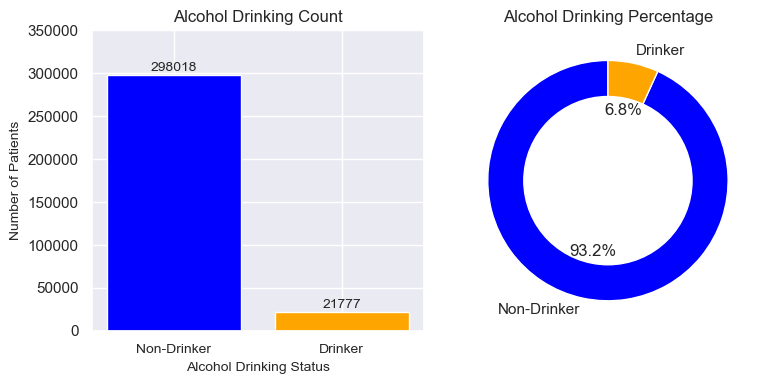

In [21]:
# Ensure order: No (Non-Drinker) first, Yes (Drinker) second
alcohol_counts = alcohol_counts.reindex(['No', 'Yes'])

# Calculate total patients
total_patients = alcohol_counts.sum()

# Compute percentages
percentages = (alcohol_counts / total_patients) * 100

# Labels and colors
labels = ['Non-Drinker', 'Drinker']
colors = ['blue', 'orange']

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))  # 8 width, 4 height

## ---- BAR CHART ---- ##
ax1.bar(alcohol_counts.index, alcohol_counts.values, color=colors)
ax1.set_title('Alcohol Drinking Count', fontsize=12)
ax1.set_xlabel('Alcohol Drinking Status', fontsize=10)
ax1.set_ylabel('Number of Patients', fontsize=10)
ax1.set_xticks([0, 1])  
ax1.set_xticklabels(['Non-Drinker', 'Drinker'], fontsize=10)
ax1.set_ylim(0, 350000)  # Extend y-axis to 350,000

# Display values on top of bars
for i, value in enumerate(alcohol_counts.values):
    ax1.text(i, value + 5000, str(value), ha='center', fontsize=10)

## ---- DONUT CHART ---- ##
ax2.pie(percentages, labels=labels, colors=colors, autopct='%.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})
ax2.set_title('Alcohol Drinking Percentage', fontsize=12)

# Add a circle to make it a donut
center_circle = plt.Circle((0, 0), 0.70, fc='white')
ax2.add_artist(center_circle)

# Adjust spacing between subplots
plt.tight_layout()

# Show plots
plt.show()

In [22]:
# Count occurrences of 'No' (Non-Stroke) and 'Yes' (Stroke)
stroke_counts = heart_disease_df['Stroke'].value_counts()

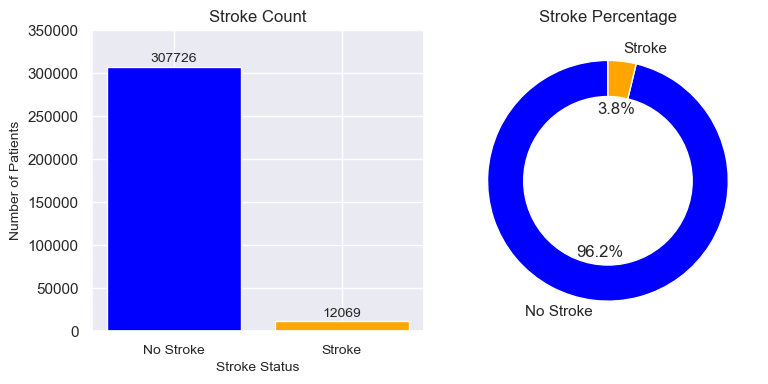

In [23]:
# Ensure order: No (Non-Stroke) first, Yes (Stroke) second
stroke_counts = stroke_counts.reindex(['No', 'Yes'])

# Calculate total patients
total_patients = stroke_counts.sum()

# Compute percentages
percentages = (stroke_counts / total_patients) * 100

# Labels and colors
labels = ['No Stroke', 'Stroke']
colors = ['blue', 'orange']

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))  # 8 width, 4 height

## ---- BAR CHART ---- ##
ax1.bar(stroke_counts.index, stroke_counts.values, color=colors)
ax1.set_title('Stroke Count', fontsize=12)
ax1.set_xlabel('Stroke Status', fontsize=10)
ax1.set_ylabel('Number of Patients', fontsize=10)
ax1.set_xticks([0, 1])  
ax1.set_xticklabels(['No Stroke', 'Stroke'], fontsize=10)
ax1.set_ylim(0, 350000)  # Extend y-axis to 350,000

# Display values on top of bars
for i, value in enumerate(stroke_counts.values):
    ax1.text(i, value + 5000, str(value), ha='center', fontsize=10)

## ---- DONUT CHART ---- ##
ax2.pie(percentages, labels=labels, colors=colors, autopct='%.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})
ax2.set_title('Stroke Percentage', fontsize=12)

# Add a circle to make it a donut
center_circle = plt.Circle((0, 0), 0.70, fc='white')
ax2.add_artist(center_circle)

# Adjust spacing between subplots
plt.tight_layout()

# Show plots
plt.show()

In [24]:
# Count occurrences of 'No' (No Difficulty Walking) and 'Yes' (Difficulty Walking)
walking_counts = heart_disease_df['DiffWalking'].value_counts()

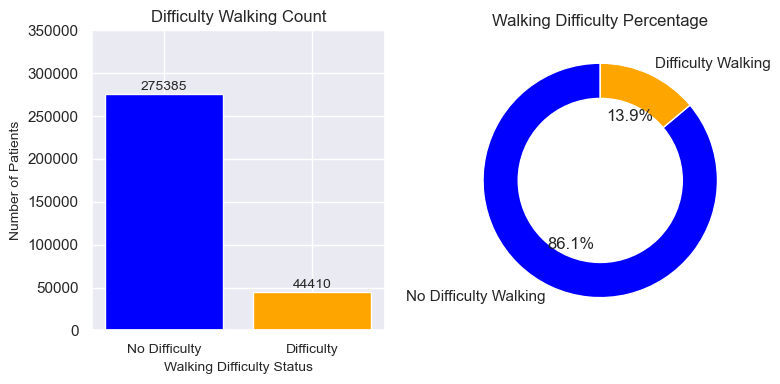

In [25]:
# Ensure order: No (No Difficulty Walking) first, Yes (Difficulty Walking) second
walking_counts = walking_counts.reindex(['No', 'Yes'])

# Calculate total patients
total_patients = walking_counts.sum()

# Compute percentages
percentages = (walking_counts / total_patients) * 100

# Labels and colors
labels = ['No Difficulty Walking', 'Difficulty Walking']
colors = ['blue', 'orange']

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))  # 8 width, 4 height

## ---- BAR CHART ---- ##
ax1.bar(walking_counts.index, walking_counts.values, color=colors)
ax1.set_title('Difficulty Walking Count', fontsize=12)
ax1.set_xlabel('Walking Difficulty Status', fontsize=10)
ax1.set_ylabel('Number of Patients', fontsize=10)
ax1.set_xticks([0, 1])  
ax1.set_xticklabels(['No Difficulty', 'Difficulty'], fontsize=10)
ax1.set_ylim(0, 350000)  # Extend y-axis to 350,000

# Display values on top of bars
for i, value in enumerate(walking_counts.values):
    ax1.text(i, value + 5000, str(value), ha='center', fontsize=10)

## ---- DONUT CHART ---- ##
ax2.pie(percentages, labels=labels, colors=colors, autopct='%.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})
ax2.set_title('Walking Difficulty Percentage', fontsize=12)

# Add a circle to make it a donut
center_circle = plt.Circle((0, 0), 0.70, fc='white')
ax2.add_artist(center_circle)

# Adjust spacing between subplots
plt.tight_layout()

# Show plots
plt.show()

In [26]:
# Count occurrences of 'No' (Non-Diabetic) and 'Yes' (Diabetic)
diabetes_counts = heart_disease_df['Diabetic'].value_counts()

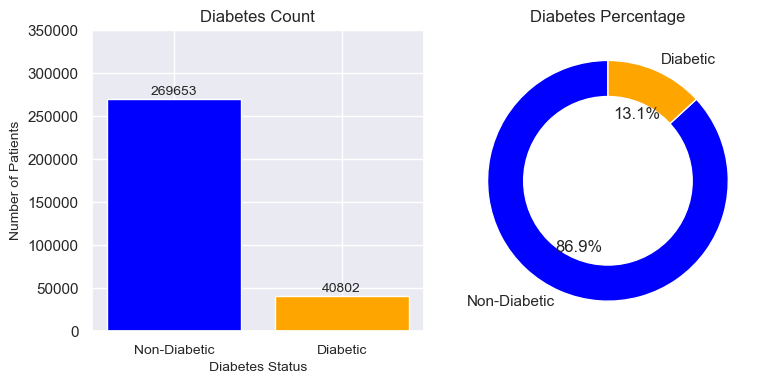

In [27]:
# Ensure order: No (Non-Diabetic) first, Yes (Diabetic) second
diabetes_counts = diabetes_counts.reindex(['No', 'Yes'])

# Calculate total patients
total_patients = diabetes_counts.sum()

# Compute percentages
percentages = (diabetes_counts / total_patients) * 100

# Labels and colors
labels = ['Non-Diabetic', 'Diabetic']
colors = ['blue', 'orange']

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))  # 8 width, 4 height

## ---- BAR CHART ---- ##
ax1.bar(diabetes_counts.index, diabetes_counts.values, color=colors)
ax1.set_title('Diabetes Count', fontsize=12)
ax1.set_xlabel('Diabetes Status', fontsize=10)
ax1.set_ylabel('Number of Patients', fontsize=10)
ax1.set_xticks([0, 1])  
ax1.set_xticklabels(['Non-Diabetic', 'Diabetic'], fontsize=10)
ax1.set_ylim(0, 350000)  # Extend y-axis to 350,000

# Display values on top of bars
for i, value in enumerate(diabetes_counts.values):
    ax1.text(i, value + 5000, str(value), ha='center', fontsize=10)

## ---- DONUT CHART ---- ##
ax2.pie(percentages, labels=labels, colors=colors, autopct='%.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})
ax2.set_title('Diabetes Percentage', fontsize=12)

# Add a circle to make it a donut
center_circle = plt.Circle((0, 0), 0.70, fc='white')
ax2.add_artist(center_circle)

# Adjust spacing between subplots
plt.tight_layout()

# Show plots
plt.show()

In [28]:
# Count occurrences of 'No' (Non-Asthmatic) and 'Yes' (Asthmatic)
asthma_counts = heart_disease_df['Asthma'].value_counts()

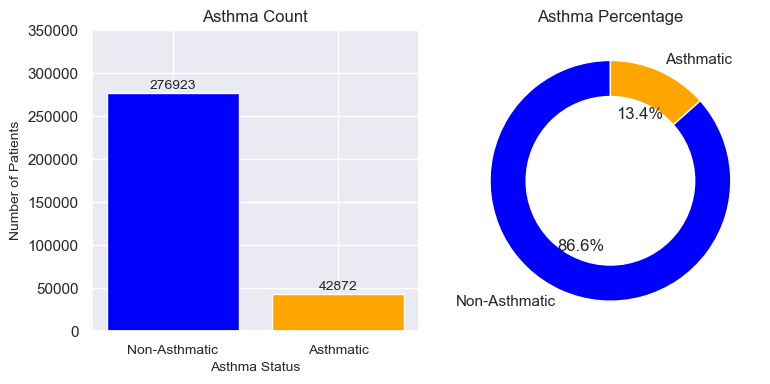

In [29]:
# Ensure order: No (Non-Asthmatic) first, Yes (Asthmatic) second
asthma_counts = asthma_counts.reindex(['No', 'Yes'])

# Calculate total patients
total_patients = asthma_counts.sum()

# Compute percentages
percentages = (asthma_counts / total_patients) * 100

# Labels and colors
labels = ['Non-Asthmatic', 'Asthmatic']
colors = ['blue', 'orange']

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))  # 8 width, 4 height

## ---- BAR CHART ---- ##
ax1.bar(asthma_counts.index, asthma_counts.values, color=colors)
ax1.set_title('Asthma Count', fontsize=12)
ax1.set_xlabel('Asthma Status', fontsize=10)
ax1.set_ylabel('Number of Patients', fontsize=10)
ax1.set_xticks([0, 1])  
ax1.set_xticklabels(['Non-Asthmatic', 'Asthmatic'], fontsize=10)
ax1.set_ylim(0, 350000)  # Extend y-axis to 350,000

# Display values on top of bars
for i, value in enumerate(asthma_counts.values):
    ax1.text(i, value + 5000, str(value), ha='center', fontsize=10)

## ---- DONUT CHART ---- ##
ax2.pie(percentages, labels=labels, colors=colors, autopct='%.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})
ax2.set_title('Asthma Percentage', fontsize=12)

# Add a circle to make it a donut
center_circle = plt.Circle((0, 0), 0.70, fc='white')
ax2.add_artist(center_circle)

# Adjust spacing between subplots
plt.tight_layout()

# Show plots
plt.show()

In [30]:
# Count occurrences of 'No' (No Kidney Disease) and 'Yes' (Kidney Disease)
kidney_counts = heart_disease_df['KidneyDisease'].value_counts()

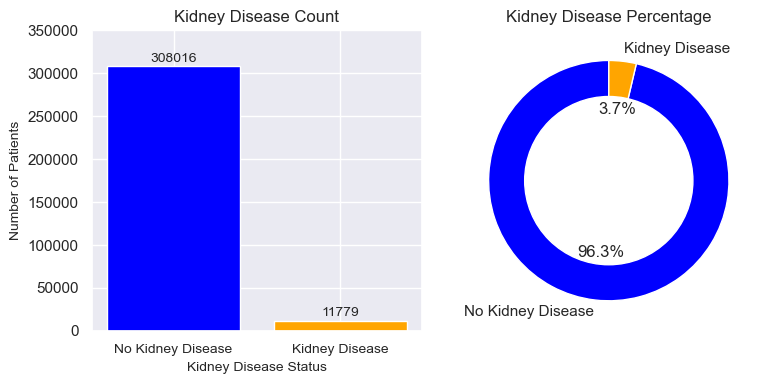

In [31]:
# Ensure order: No (No Kidney Disease) first, Yes (Kidney Disease) second
kidney_counts = kidney_counts.reindex(['No', 'Yes'])

# Calculate total patients
total_patients = kidney_counts.sum()

# Compute percentages
percentages = (kidney_counts / total_patients) * 100

# Labels and colors
labels = ['No Kidney Disease', 'Kidney Disease']
colors = ['blue', 'orange']

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))  # 8 width, 4 height

## ---- BAR CHART ---- ##
ax1.bar(kidney_counts.index, kidney_counts.values, color=colors)
ax1.set_title('Kidney Disease Count', fontsize=12)
ax1.set_xlabel('Kidney Disease Status', fontsize=10)
ax1.set_ylabel('Number of Patients', fontsize=10)
ax1.set_xticks([0, 1])  
ax1.set_xticklabels(['No Kidney Disease', 'Kidney Disease'], fontsize=10)
ax1.set_ylim(0, 350000)  # Extend y-axis to 350,000

# Display values on top of bars
for i, value in enumerate(kidney_counts.values):
    ax1.text(i, value + 5000, str(value), ha='center', fontsize=10)

## ---- DONUT CHART ---- ##
ax2.pie(percentages, labels=labels, colors=colors, autopct='%.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})
ax2.set_title('Kidney Disease Percentage', fontsize=12)

# Add a circle to make it a donut
center_circle = plt.Circle((0, 0), 0.70, fc='white')
ax2.add_artist(center_circle)

# Adjust spacing between subplots
plt.tight_layout()

# Show plots
plt.show()

In [32]:
# Count occurrences of 'No' (No Skin Cancer) and 'Yes' (Skin Cancer)
skin_cancer_counts = heart_disease_df['SkinCancer'].value_counts()

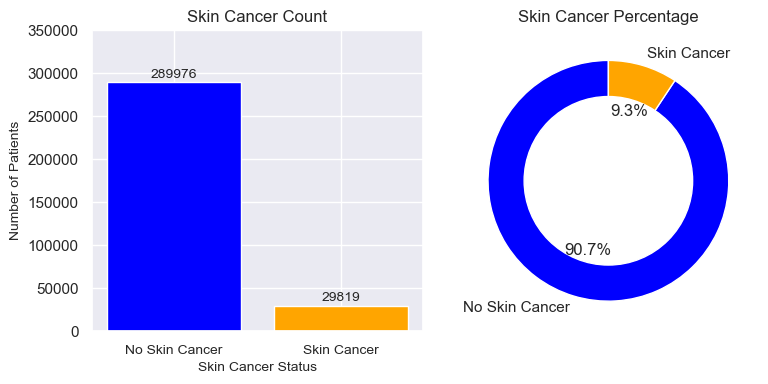

In [33]:
# Ensure order: No (No Skin Cancer) first, Yes (Skin Cancer) second
skin_cancer_counts = skin_cancer_counts.reindex(['No', 'Yes'])

# Calculate total patients
total_patients = skin_cancer_counts.sum()

# Compute percentages
percentages = (skin_cancer_counts / total_patients) * 100

# Labels and colors
labels = ['No Skin Cancer', 'Skin Cancer']
colors = ['blue', 'orange']

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))  # 8 width, 4 height

## ---- BAR CHART ---- ##
ax1.bar(skin_cancer_counts.index, skin_cancer_counts.values, color=colors)
ax1.set_title('Skin Cancer Count', fontsize=12)
ax1.set_xlabel('Skin Cancer Status', fontsize=10)
ax1.set_ylabel('Number of Patients', fontsize=10)
ax1.set_xticks([0, 1])  
ax1.set_xticklabels(['No Skin Cancer', 'Skin Cancer'], fontsize=10)
ax1.set_ylim(0, 350000)  # Extend y-axis to 350,000

# Display values on top of bars
for i, value in enumerate(skin_cancer_counts.values):
    ax1.text(i, value + 5000, str(value), ha='center', fontsize=10)

## ---- DONUT CHART ---- ##
ax2.pie(percentages, labels=labels, colors=colors, autopct='%.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})
ax2.set_title('Skin Cancer Percentage', fontsize=12)

# Add a circle to make it a donut
center_circle = plt.Circle((0, 0), 0.70, fc='white')
ax2.add_artist(center_circle)

# Adjust spacing between subplots
plt.tight_layout()

# Show plots
plt.show()

In [34]:
# Count occurrences of 'No' (No Physical Activity) and 'Yes' (Physical Activity)
physical_activity_counts = heart_disease_df['PhysicalActivity'].value_counts()

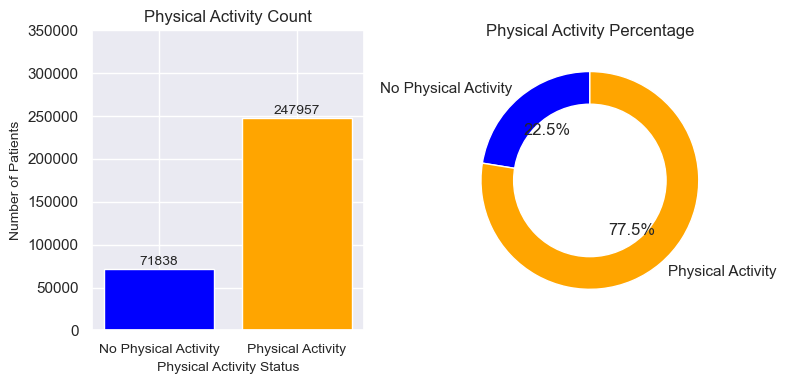

In [35]:
# Ensure order: No (No Physical Activity) first, Yes (Physical Activity) second
physical_activity_counts = physical_activity_counts.reindex(['No', 'Yes'])

# Calculate total patients
total_patients = physical_activity_counts.sum()

# Compute percentages
percentages = (physical_activity_counts / total_patients) * 100

# Labels and colors
labels = ['No Physical Activity', 'Physical Activity']
colors = ['blue', 'orange']

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))  # 8 width, 4 height

## ---- BAR CHART ---- ##
ax1.bar(physical_activity_counts.index, physical_activity_counts.values, color=colors)
ax1.set_title('Physical Activity Count', fontsize=12)
ax1.set_xlabel('Physical Activity Status', fontsize=10)
ax1.set_ylabel('Number of Patients', fontsize=10)
ax1.set_xticks([0, 1])  
ax1.set_xticklabels(['No Physical Activity', 'Physical Activity'], fontsize=10)
ax1.set_ylim(0, 350000)  # Extend y-axis to 350,000

# Display values on top of bars
for i, value in enumerate(physical_activity_counts.values):
    ax1.text(i, value + 5000, str(value), ha='center', fontsize=10)

## ---- DONUT CHART ---- ##
ax2.pie(percentages, labels=labels, colors=colors, autopct='%.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})
ax2.set_title('Physical Activity Percentage', fontsize=12)

# Add a circle to make it a donut
center_circle = plt.Circle((0, 0), 0.70, fc='white')
ax2.add_artist(center_circle)

# Adjust spacing between subplots
plt.tight_layout()

# Show plots
plt.show()

In [36]:
# Count occurrences of 'Female' and 'Male'
sex_counts = heart_disease_df['Sex'].value_counts()

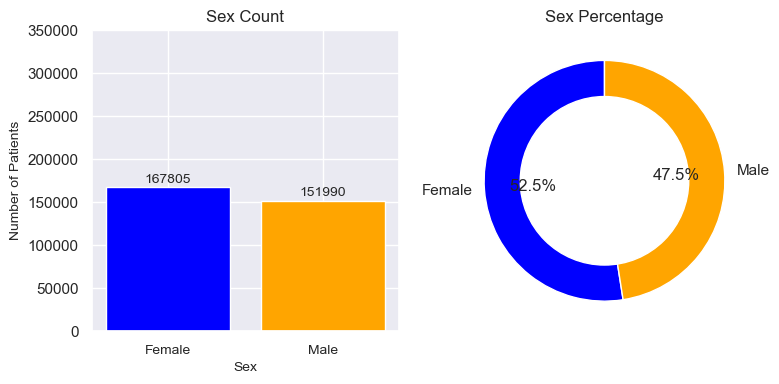

In [37]:
# Ensure order: Female first, Male second
sex_counts = sex_counts.reindex(['Female', 'Male'])

# Calculate total patients
total_patients = sex_counts.sum()

# Compute percentages
percentages = (sex_counts / total_patients) * 100

# Labels and colors
labels = ['Female', 'Male']
colors = ['blue', 'orange']

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))  # 8 width, 4 height

## ---- BAR CHART ---- ##
ax1.bar(sex_counts.index, sex_counts.values, color=colors)
ax1.set_title('Sex Count', fontsize=12)
ax1.set_xlabel('Sex', fontsize=10)
ax1.set_ylabel('Number of Patients', fontsize=10)
ax1.set_xticks([0, 1])  
ax1.set_xticklabels(['Female', 'Male'], fontsize=10)
ax1.set_ylim(0, 350000)  # Extend y-axis to 350,000

# Display values on top of bars
for i, value in enumerate(sex_counts.values):
    ax1.text(i, value + 5000, str(value), ha='center', fontsize=10)

## ---- DONUT CHART ---- ##
ax2.pie(percentages, labels=labels, colors=colors, autopct='%.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})
ax2.set_title('Sex Percentage', fontsize=12)

# Add a circle to make it a donut
center_circle = plt.Circle((0, 0), 0.70, fc='white')
ax2.add_artist(center_circle)

# Adjust spacing between subplots
plt.tight_layout()

# Show plots
plt.show()

In [38]:
# Get unique races
unique_races = heart_disease_df['Race'].unique()

# Convert to list and display
race_list = unique_races.tolist()
print(race_list)

['White', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Other', 'Hispanic']


In [39]:
# Define the races of interest
races_of_interest = ['White', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Other', 'Hispanic']

# Filter the dataframe to include only those races and count occurrences
race_counts = heart_disease_df['Race'].value_counts().reindex(races_of_interest, fill_value=0)

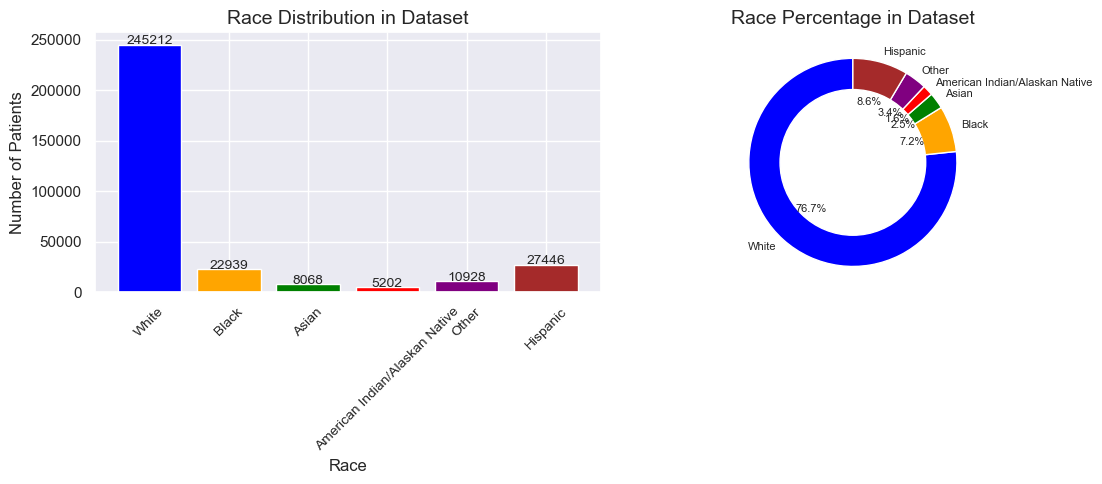

In [40]:
# Calculate total patients
total_patients = race_counts.sum()

# Compute percentages
percentages = (race_counts / total_patients) * 100

# Colors for consistency
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 12 width, 5 height

## ---- BAR CHART ---- ##
ax1.bar(race_counts.index, race_counts.values, color=colors)
ax1.set_title('Race Distribution in Dataset', fontsize=14)
ax1.set_xlabel('Race', fontsize=12)
ax1.set_ylabel('Number of Patients', fontsize=12)
ax1.set_xticks(range(len(races_of_interest)))
ax1.set_xticklabels(races_of_interest, rotation=45, fontsize=10)

# Display values on top of bars
for i, value in enumerate(race_counts.values):
    ax1.text(i, value + 500, str(value), ha='center', fontsize=10)

## ---- DONUT CHART ---- ##
def smaller_autopct(pct):
    return ('%.1f%%' % pct) if pct > 0 else ''  # Keep formatting but adjust size

wedges, texts, autotexts = ax2.pie(
    percentages, labels=races_of_interest, colors=colors, autopct=smaller_autopct,
    startangle=90, wedgeprops={'edgecolor': 'white'}, textprops={'fontsize': 8}  # Reduce font size by 30%
)

# Add a circle to make it a donut chart
center_circle = plt.Circle((0, 0), 0.70, fc='white')
ax2.add_artist(center_circle)

ax2.set_title('Race Percentage in Dataset', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [41]:
# Get general health
unique_health = heart_disease_df['GenHealth'].unique()

# Convert to list and display
health_list = unique_health.tolist()
print(health_list)

['Very good', 'Fair', 'Good', 'Poor', 'Excellent']


In [42]:
# Define the general health categories of interest
gen_health_categories = ['Very good', 'Fair', 'Good', 'Poor', 'Excellent']

# Filter the dataframe to include only those categories and count occurrences
gen_health_counts = heart_disease_df['GenHealth'].value_counts().reindex(gen_health_categories, fill_value=0)

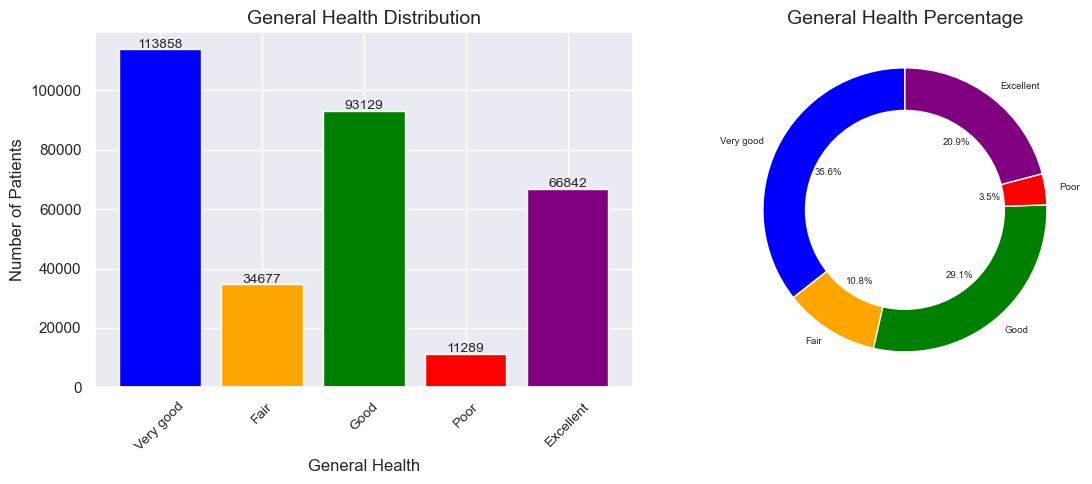

In [43]:
# Calculate total patients
total_patients = gen_health_counts.sum()

# Compute percentages
percentages = (gen_health_counts / total_patients) * 100

# Colors for consistency
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 12 width, 5 height

## ---- BAR CHART ---- ##
ax1.bar(gen_health_counts.index, gen_health_counts.values, color=colors)
ax1.set_title('General Health Distribution', fontsize=14)
ax1.set_xlabel('General Health', fontsize=12)
ax1.set_ylabel('Number of Patients', fontsize=12)
ax1.set_xticks(range(len(gen_health_categories)))
ax1.set_xticklabels(gen_health_categories, rotation=45, fontsize=10)

# Display values on top of bars
for i, value in enumerate(gen_health_counts.values):
    ax1.text(i, value + 500, str(value), ha='center', fontsize=10)

## ---- DONUT CHART ---- ##
def smaller_autopct(pct):
    return ('%.1f%%' % pct) if pct > 0 else ''  # Reduce font size for percentages

wedges, texts, autotexts = ax2.pie(
    percentages, labels=gen_health_categories, colors=colors, autopct=smaller_autopct,
    startangle=90, wedgeprops={'edgecolor': 'white'}, textprops={'fontsize': 7}  # Reduce font size by 30%
)

# Add a circle to make it a donut chart
center_circle = plt.Circle((0, 0), 0.70, fc='white')
ax2.add_artist(center_circle)

ax2.set_title('General Health Percentage', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [44]:
# Define the age categories of interest
age_categories = ['25-29', '30-34', '35-39', '40-44', '45-49', '50-54', 
                  '55-59', '60-64', '65-69', '70-74', '75-79', '80 and over']

# Filter the dataframe to include only those categories and count occurrences
age_counts = heart_disease_df['AgeCategory'].value_counts().reindex(age_categories, fill_value=0)

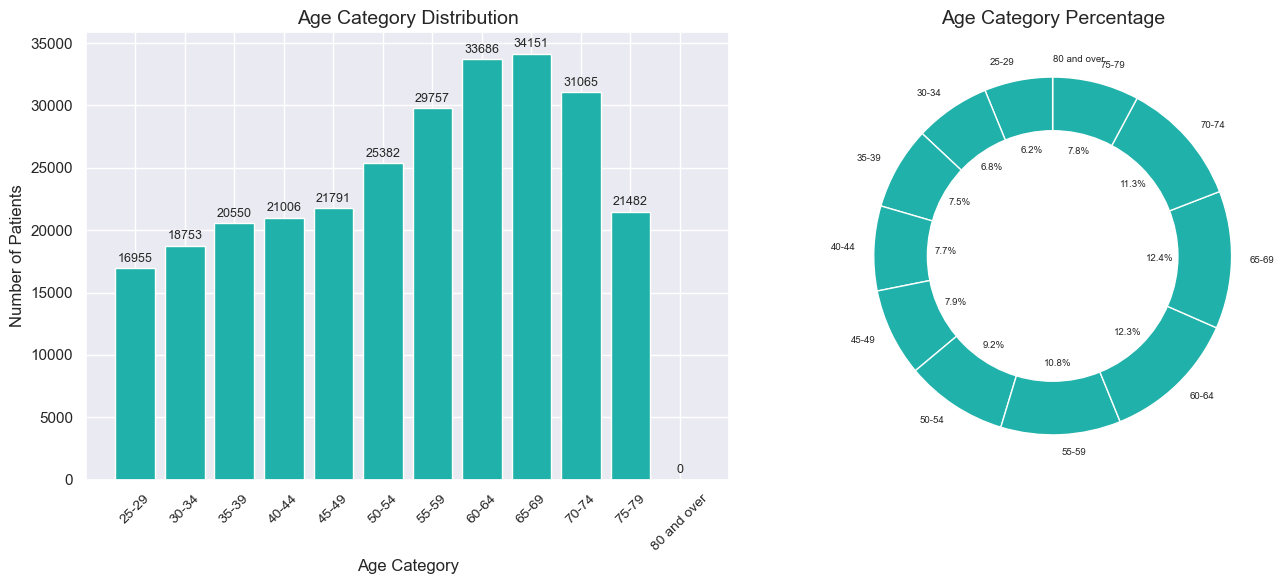

In [45]:
# Calculate total patients
total_patients = age_counts.sum()

# Compute percentages
percentages = (age_counts / total_patients) * 100

# Define a recognizable green color
light_sea_green = '#20B2AA'  # Light sea green (built-in recognizable color)

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # 14 width, 6 height

## ---- BAR CHART ---- ##
ax1.bar(age_counts.index, age_counts.values, color=light_sea_green)
ax1.set_title('Age Category Distribution', fontsize=14)
ax1.set_xlabel('Age Category', fontsize=12)
ax1.set_ylabel('Number of Patients', fontsize=12)
ax1.set_xticks(range(len(age_categories)))
ax1.set_xticklabels(age_categories, rotation=45, fontsize=10)

# Display values on top of bars
for i, value in enumerate(age_counts.values):
    ax1.text(i, value + 500, str(value), ha='center', fontsize=9)

## ---- DONUT CHART ---- ##
def smaller_autopct(pct):
    return ('%.1f%%' % pct) if pct > 0 else ''  # Reduce font size for percentages

# Use light sea green for the entire pie chart
wedges, texts, autotexts = ax2.pie(
    percentages, labels=age_categories, colors=[light_sea_green] * len(age_categories), autopct=smaller_autopct,
    startangle=90, wedgeprops={'edgecolor': 'white'}, textprops={'fontsize': 7}  # Reduce font size by 30%
)

# Add a circle to make it a donut chart
center_circle = plt.Circle((0, 0), 0.70, fc='white')
ax2.add_artist(center_circle)

ax2.set_title('Age Category Percentage', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [46]:
# Get general health
unique_sleep_times = sorted(heart_disease_df['SleepTime'].unique())

print(unique_sleep_times)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0]


In [47]:
# Define the sleep time periods to include (1.0 to 13.0 only)
sleep_times = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]

# Count occurrences of each sleep time
sleep_counts = heart_disease_df['SleepTime'].value_counts()

# Filter only the specified sleep times (1.0 to 13.0)
filtered_counts = {str(time): sleep_counts.get(time, 0) for time in sleep_times}

# Convert to a pandas Series for easy plotting
sleep_counts_final = pd.Series(filtered_counts)

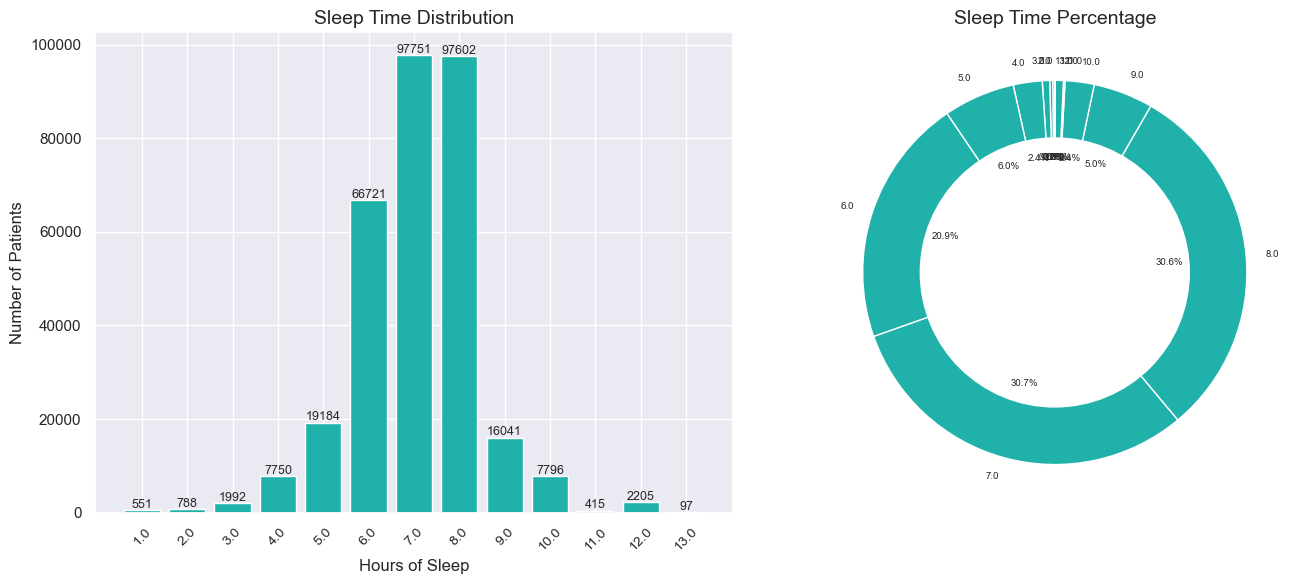

In [48]:
# Recalculate percentages after filtering
total_patients = sleep_counts_final.sum()
percentages_final = (sleep_counts_final / total_patients) * 100

# Define a recognizable color (light sea green)
light_sea_green = '#20B2AA'

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # 14 width, 6 height

## ---- BAR CHART ---- ##
ax1.bar(sleep_counts_final.index, sleep_counts_final.values, color=light_sea_green)
ax1.set_title('Sleep Time Distribution', fontsize=14)
ax1.set_xlabel('Hours of Sleep', fontsize=12)
ax1.set_ylabel('Number of Patients', fontsize=12)
ax1.set_xticks(range(len(sleep_counts_final)))  
ax1.set_xticklabels(sleep_counts_final.index, rotation=45, fontsize=10)  # Rotate labels for clarity

# Display values on top of bars
for i, value in enumerate(sleep_counts_final.values):
    ax1.text(i, value + 500, str(value), ha='center', fontsize=9)

## ---- DONUT CHART ---- ##
def smaller_autopct(pct):
    return ('%.1f%%' % pct) if pct > 0 else ''  # Reduce font size for percentages

# Create the donut chart
ax2.pie(
    percentages_final, labels=sleep_counts_final.index, colors=[light_sea_green] * len(sleep_counts_final),
    autopct=smaller_autopct, startangle=90, wedgeprops={'edgecolor': 'white'}, textprops={'fontsize': 7}  # Reduce font size by 30%
)

# Add a circle to make it a donut chart
center_circle = plt.Circle((0, 0), 0.70, fc='white')
ax2.add_artist(center_circle)

ax2.set_title('Sleep Time Percentage', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [49]:
# Define sleep time periods (1.0 to 24.0)
sleep_times = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 
               13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0]

# Count occurrences of each sleep time
sleep_counts = heart_disease_df['SleepTime'].value_counts()

# Create dictionaries for storing counts (ensuring missing times are counted as 0)
sleep_counts_all = {str(time): sleep_counts.get(time, 0) for time in sleep_times}

# Convert to pandas Series for easy plotting
sleep_counts_final = pd.Series(sleep_counts_all)

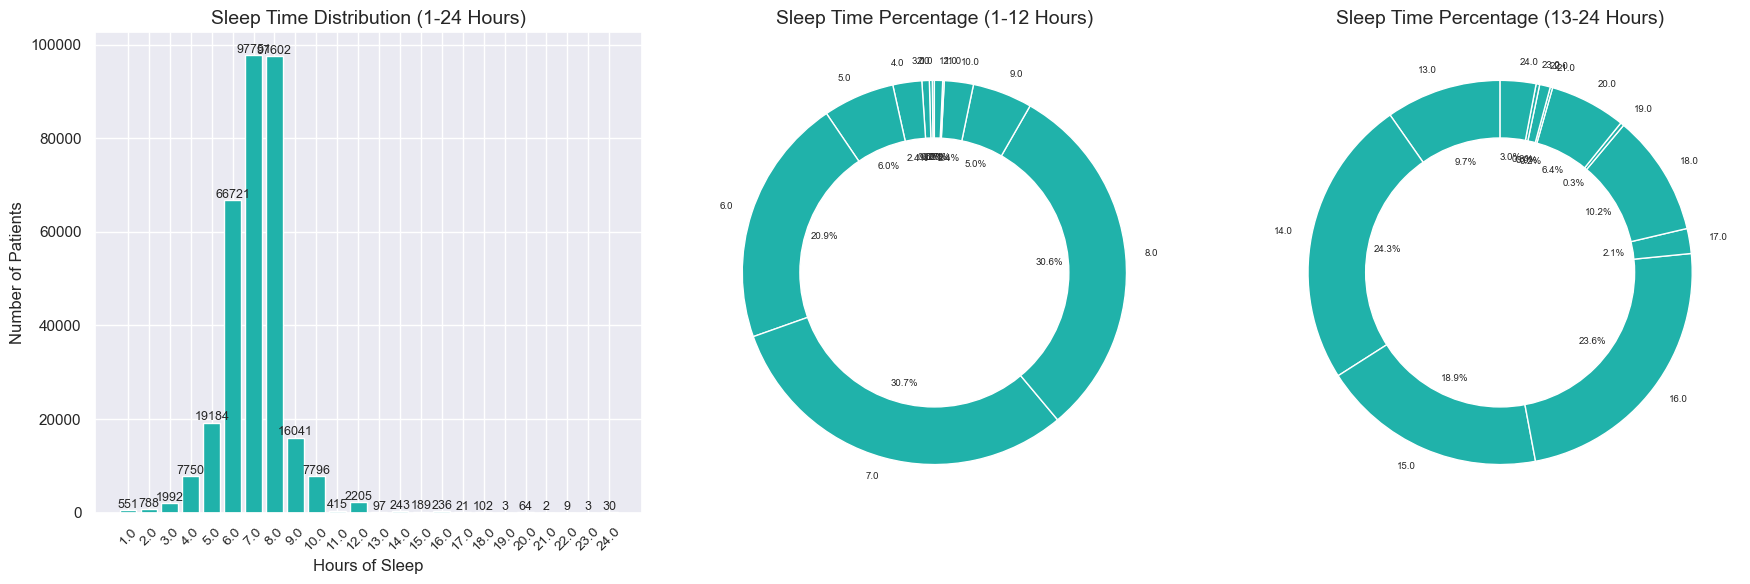

In [50]:
# **Split data into two groups for donut charts**
sleep_counts_1_12 = sleep_counts_final.iloc[:12]  # Sleep times 1.0 - 12.0
sleep_counts_13_24 = sleep_counts_final.iloc[12:]  # Sleep times 13.0 - 24.0

# Compute total patients for percentages
total_1_12 = sleep_counts_1_12.sum()
total_13_24 = sleep_counts_13_24.sum()

# Calculate percentages for both groups
percentages_1_12 = (sleep_counts_1_12 / total_1_12) * 100
percentages_13_24 = (sleep_counts_13_24 / total_13_24) * 100

# Define color scheme
light_sea_green = '#20B2AA'

# Create figure with 1 bar chart + 2 donut charts
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))  # 18 width, 6 height

## ---- BAR CHART (All Sleep Times) ---- ##
ax1.bar(sleep_counts_final.index, sleep_counts_final.values, color=light_sea_green)
ax1.set_title('Sleep Time Distribution (1-24 Hours)', fontsize=14)
ax1.set_xlabel('Hours of Sleep', fontsize=12)
ax1.set_ylabel('Number of Patients', fontsize=12)
ax1.set_xticks(range(len(sleep_counts_final)))  
ax1.set_xticklabels(sleep_counts_final.index, rotation=45, fontsize=10)  # Rotate labels for clarity

# Display values on top of bars
for i, value in enumerate(sleep_counts_final.values):
    ax1.text(i, value + 500, str(value), ha='center', fontsize=9)

## ---- DONUT CHART (1.0 - 12.0) ---- ##
ax2.pie(
    percentages_1_12, labels=sleep_counts_1_12.index, colors=[light_sea_green] * len(sleep_counts_1_12),
    autopct=lambda pct: ('%.1f%%' % pct) if pct > 0 else '', startangle=90, wedgeprops={'edgecolor': 'white'},
    textprops={'fontsize': 7}  # Reduce font size by 30%
)

# Add a circle to make it a donut chart
center_circle_1 = plt.Circle((0, 0), 0.70, fc='white')
ax2.add_artist(center_circle_1)

ax2.set_title('Sleep Time Percentage (1-12 Hours)', fontsize=14)

## ---- DONUT CHART (13.0 - 24.0) ---- ##
ax3.pie(
    percentages_13_24, labels=sleep_counts_13_24.index, colors=[light_sea_green] * len(sleep_counts_13_24),
    autopct=lambda pct: ('%.1f%%' % pct) if pct > 0 else '', startangle=90, wedgeprops={'edgecolor': 'white'},
    textprops={'fontsize': 7}  # Reduce font size by 30%
)

# Add a circle to make it a donut chart
center_circle_2 = plt.Circle((0, 0), 0.70, fc='white')
ax3.add_artist(center_circle_2)

ax3.set_title('Sleep Time Percentage (13-24 Hours)', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [51]:
# Get the minimum and maximum BMI values
min_bmi = heart_disease_df['BMI'].min()
max_bmi = heart_disease_df['BMI'].max()

# Print the range
print(f"BMI Range: {min_bmi} - {max_bmi}")

BMI Range: 12.02 - 94.85


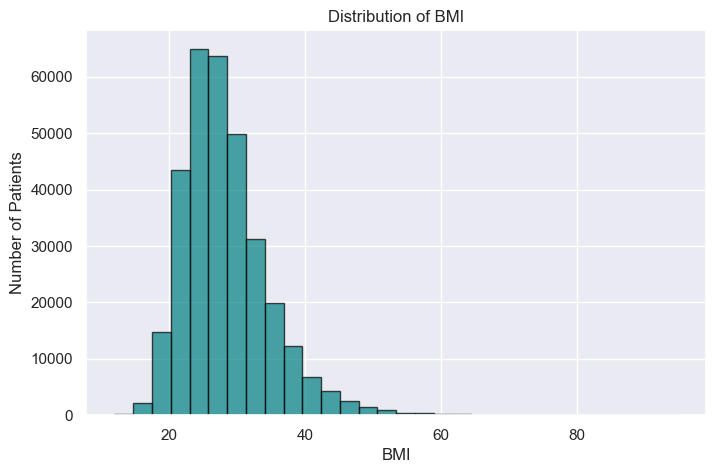

In [52]:
# Create histogram
plt.figure(figsize=(8, 5))
plt.hist(heart_disease_df['BMI'], bins=30, color='teal', edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel('BMI')
plt.ylabel('Number of Patients')
plt.title('Distribution of BMI')

# Show plot
plt.show()

In [53]:
# Get physical health
unique_physical_health = sorted(heart_disease_df['PhysicalHealth'].unique())

print(unique_physical_health)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0]


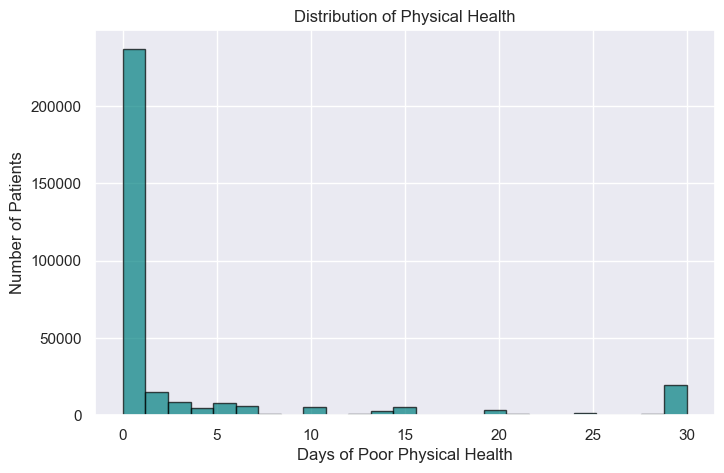

In [54]:
# Create histogram with 12 bins
plt.figure(figsize=(8, 5))
plt.hist(heart_disease_df['PhysicalHealth'], bins=25, color='teal', edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel('Days of Poor Physical Health')
plt.ylabel('Number of Patients')
plt.title('Distribution of Physical Health')

# Show plot
plt.show()

In [55]:
# Get mental health
unique_mental_health = sorted(heart_disease_df['MentalHealth'].unique())

print(unique_mental_health)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0]


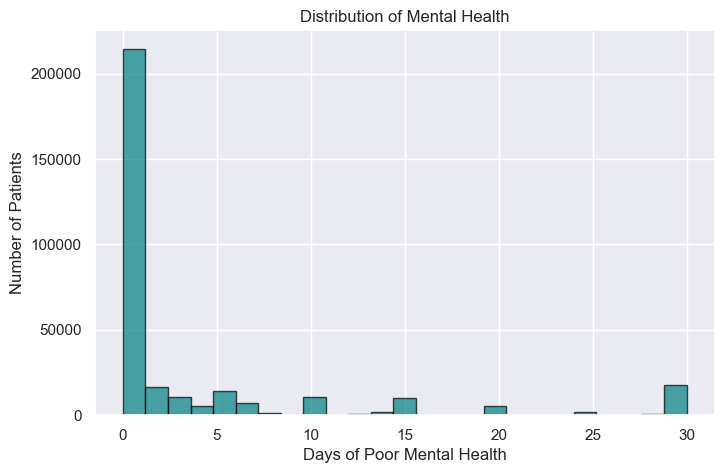

In [56]:
# Create histogram with 12 bins
plt.figure(figsize=(8, 5))
plt.hist(heart_disease_df['MentalHealth'], bins=25, color='teal', edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel('Days of Poor Mental Health')
plt.ylabel('Number of Patients')
plt.title('Distribution of Mental Health')

# Show plot
plt.show()

## **6 Exploratory Data Analysis**

In [58]:
# Encode HeartDisease as numeric (No = 0, Yes = 1)
heart_disease_df['HeartDisease'] = heart_disease_df['HeartDisease'].map({'No': 0, 'Yes': 1})

# Prepare the data
X = heart_disease_df[['BMI']]  # Independent variable: BMI
y = heart_disease_df['HeartDisease']  # Dependent variable: HeartDisease (binary: 0 or 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy * 100:.2f}%')

# If you want to see the logistic regression coefficients:
print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)

Logistic Regression Accuracy: 91.36%
Coefficients: [[0.02723949]]
Intercept: [-3.15781342]


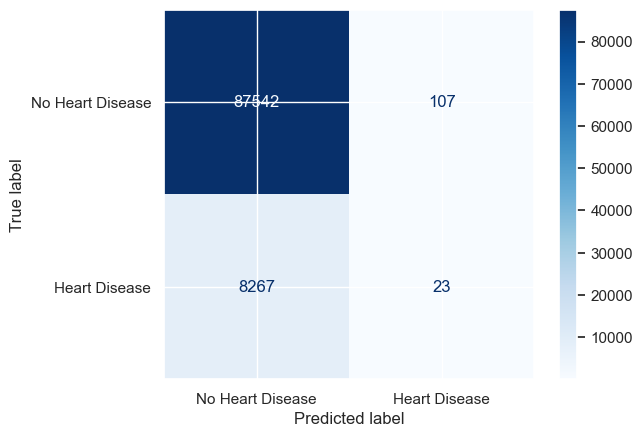

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease', 'Heart Disease'])
disp.plot(cmap='Blues')  # Plot confusion matrix with color map
plt.show()

In [60]:
# Prepare the data
X = heart_disease_df[['BMI']]  # Independent variable: BMI
y = heart_disease_df['HeartDisease']  # Dependent variable: HeartDisease (binary: 0 or 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy * 100:.2f}%')

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.4f}')

# R-squared score (R2)
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.4f}')

# If you want to see the logistic regression coefficients:
print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)

Logistic Regression Accuracy: 91.36%
Mean Squared Error (MSE): 0.0864
R² Score: -0.0946
Coefficients: [[0.02723949]]
Intercept: [-3.15781342]


In [144]:
import pandas as pd
import scipy.stats as stats

# Creating a contingency table
contingency_table = pd.crosstab(heart_disease_df['HeartDisease'], heart_disease_df['Smoking'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Output results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")

# Format p-value with scientific notation if very small
formatted_p = f"{p:.3g}" if p > 0 else "< 1e-10"
print(f"P-Value: {formatted_p}")

# Compute Cramér’s V
n = contingency_table.sum().sum()  # Total sample size
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Output Cramér’s V
print(f"\nCramér’s V: {cramers_v:.4f}")

# Interpretation
alpha = 0.05  # Common significance level
if p < alpha:
    print("There is a significant association between smoking and heart disease.")
else:
    print("There is no significant association between smoking and heart disease.")

Contingency Table:
Smoking           No     Yes
HeartDisease                
0             176551  115871
1              11336   16037

Chi-Square Test Results:
Chi-Square Statistic: 3713.0331
Degrees of Freedom: 1
P-Value: < 1e-10

Cramér’s V: 0.1078
There is a significant association between smoking and heart disease.


In [146]:
# Creating a contingency table
contingency_table = pd.crosstab(heart_disease_df['HeartDisease'], heart_disease_df['AlcoholDrinking'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Output results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")

# Format p-value with scientific notation if very small
formatted_p = f"{p:.3g}" if p > 0 else "< 1e-10"
print(f"P-Value: {formatted_p}")

# Compute Cramér’s V
n = contingency_table.sum().sum()  # Total sample size
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Output Cramér’s V
print(f"\nCramér’s V: {cramers_v:.4f}")

# Interpretation
alpha = 0.05  # Common significance level
if p < alpha:
    print("There is a significant association between heart disease and alcohol drinking.")
else:
    print("There is no significant association between heart disease and alcohol drinking.")

Contingency Table:
AlcoholDrinking      No    Yes
HeartDisease                  
0                271786  20636
1                 26232   1141

Chi-Square Test Results:
Chi-Square Statistic: 328.6492
Degrees of Freedom: 1
P-Value: 1.89e-73

Cramér’s V: 0.0321
There is a significant association between heart disease and alcohol drinking.


In [148]:
# Creating a contingency table
contingency_table = pd.crosstab(heart_disease_df['HeartDisease'], heart_disease_df['Stroke'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Output results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")

# Format p-value with scientific notation if very small
formatted_p = f"{p:.3g}" if p > 0 else "< 1e-10"
print(f"P-Value: {formatted_p}")

# Compute Cramér’s V
n = contingency_table.sum().sum()  # Total sample size
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Output Cramér’s V
print(f"\nCramér’s V: {cramers_v:.4f}")

# Interpretation
alpha = 0.05  # Common significance level
if p < alpha:
    print("There is a significant association between heart disease and stroke.")
else:
    print("There is no significant association between heart disease and stroke.")

Contingency Table:
Stroke            No   Yes
HeartDisease              
0             284742  7680
1              22984  4389

Chi-Square Test Results:
Chi-Square Statistic: 12386.4889
Degrees of Freedom: 1
P-Value: < 1e-10

Cramér’s V: 0.1968
There is a significant association between heart disease and stroke.


In [150]:
# Creating a contingency table
contingency_table = pd.crosstab(heart_disease_df['HeartDisease'], heart_disease_df['DiffWalking'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Output results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")

# Format p-value with scientific notation if very small
formatted_p = f"{p:.3g}" if p > 0 else "< 1e-10"
print(f"P-Value: {formatted_p}")

# Compute Cramér’s V
n = contingency_table.sum().sum()  # Total sample size
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Output Cramér’s V
print(f"\nCramér’s V: {cramers_v:.4f}")

# Interpretation
alpha = 0.05  # Common significance level
if p < alpha:
    print("There is a significant association between heart disease and difficulty walking.")
else:
    print("There is no significant association between heart disease and difficulty walking.")

Contingency Table:
DiffWalking       No    Yes
HeartDisease               
0             258040  34382
1              17345  10028

Chi-Square Test Results:
Chi-Square Statistic: 12951.1530
Degrees of Freedom: 1
P-Value: < 1e-10

Cramér’s V: 0.2012
There is a significant association between heart disease and difficulty walking.


In [152]:
# Creating a contingency table
contingency_table = pd.crosstab(heart_disease_df['HeartDisease'], heart_disease_df['Sex'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Output results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")

# Format p-value with scientific notation if very small
formatted_p = f"{p:.3g}" if p > 0 else "< 1e-10"
print(f"P-Value: {formatted_p}")

# Compute Cramér’s V
n = contingency_table.sum().sum()  # Total sample size
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Output Cramér’s V
print(f"\nCramér’s V: {cramers_v:.4f}")

# Interpretation
alpha = 0.05  # Common significance level
if p < alpha:
    print("There is a significant association between heart disease and sex.")
else:
    print("There is no significant association between heart disease and sex.")

Contingency Table:
Sex           Female    Male
HeartDisease                
0             156571  135851
1              11234   16139

Chi-Square Test Results:
Chi-Square Statistic: 1568.3069
Degrees of Freedom: 1
P-Value: < 1e-10

Cramér’s V: 0.0700
There is a significant association between heart disease and sex.


In [154]:
# Creating a contingency table
contingency_table = pd.crosstab(heart_disease_df['HeartDisease'], heart_disease_df['Diabetic'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Output results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")

# Format p-value with scientific notation if very small
formatted_p = f"{p:.3g}" if p > 0 else "< 1e-10"
print(f"P-Value: {formatted_p}")

# Compute Cramér’s V
n = contingency_table.sum().sum()  # Total sample size
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Output Cramér’s V
print(f"\nCramér’s V: {cramers_v:.4f}")

# Interpretation
alpha = 0.05  # Common significance level
if p < alpha:
    print("There is a significant association between heart disease and diabetes.")
else:
    print("There is no significant association between heart disease and diabetes.")

Contingency Table:
Diabetic          No  No, borderline diabetes    Yes  Yes (during pregnancy)
HeartDisease                                                                
0             252134                     5992  31845                    2451
1              17519                      789   8957                     108

Chi-Square Test Results:
Chi-Square Statistic: 10959.8613
Degrees of Freedom: 3
P-Value: < 1e-10

Cramér’s V: 0.1851
There is a significant association between heart disease and diabetes.


In [156]:
# Creating a contingency table
contingency_table = pd.crosstab(heart_disease_df['HeartDisease'], heart_disease_df['PhysicalActivity'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Output results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")

# Format p-value with scientific notation if very small
formatted_p = f"{p:.3g}" if p > 0 else "< 1e-10"
print(f"P-Value: {formatted_p}")

# Compute Cramér’s V
n = contingency_table.sum().sum()  # Total sample size
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Output Cramér’s V
print(f"\nCramér’s V: {cramers_v:.4f}")

# Interpretation
alpha = 0.05  # Common significance level
if p < alpha:
    print("There is a significant association between heart disease and physical activity.")
else:
    print("There is no significant association between heart disease and physical activity.")

Contingency Table:
PhysicalActivity     No     Yes
HeartDisease                   
0                 61954  230468
1                  9884   17489

Chi-Square Test Results:
Chi-Square Statistic: 3199.0082
Degrees of Freedom: 1
P-Value: < 1e-10

Cramér’s V: 0.1000
There is a significant association between heart disease and physical activity.


In [158]:
# Creating a contingency table
contingency_table = pd.crosstab(heart_disease_df['HeartDisease'], heart_disease_df['GenHealth'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Output results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")

# Format p-value with scientific notation if very small
formatted_p = f"{p:.3g}" if p > 0 else "< 1e-10"
print(f"P-Value: {formatted_p}")

# Compute Cramér’s V
n = contingency_table.sum().sum()  # Total sample size
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Output Cramér’s V
print(f"\nCramér’s V: {cramers_v:.4f}")

# Interpretation
alpha = 0.05  # Common significance level
if p < alpha:
    print("There is a significant association between heart disease and general health.")
else:
    print("There is no significant association between heart disease and general health.")

Contingency Table:
GenHealth     Excellent   Fair   Good  Poor  Very good
HeartDisease                                          
0                 65342  27593  83571  7439     108477
1                  1500   7084   9558  3850       5381

Chi-Square Test Results:
Chi-Square Statistic: 21542.1774
Degrees of Freedom: 4
P-Value: < 1e-10

Cramér’s V: 0.2595
There is a significant association between heart disease and general health.


In [160]:
# Creating a contingency table
contingency_table = pd.crosstab(heart_disease_df['HeartDisease'], heart_disease_df['AgeCategory'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Output results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")

# Format p-value with scientific notation if very small
formatted_p = f"{p:.3g}" if p > 0 else "< 1e-10"
print(f"P-Value: {formatted_p}")

# Compute Cramér’s V
n = contingency_table.sum().sum()  # Total sample size
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Output Cramér’s V
print(f"\nCramér’s V: {cramers_v:.4f}")

# Interpretation
alpha = 0.05  # Common significance level
if p < alpha:
    print("There is a significant association between heart disease and age.")
else:
    print("There is no significant association between heart disease and age.")

Contingency Table:
AgeCategory   18-24  25-29  30-34  35-39  40-44  45-49  50-54  55-59  60-64  \
HeartDisease                                                                  
0             20934  16822  18527  20254  20520  21047  23999  27555  30359   
1               130    133    226    296    486    744   1383   2202   3327   

AgeCategory   65-69  70-74  75-79  80 or older  
HeartDisease                                    
0             30050  26218  17433        18704  
1              4101   4847   4049         5449  

Chi-Square Test Results:
Chi-Square Statistic: 19299.9204
Degrees of Freedom: 12
P-Value: < 1e-10

Cramér’s V: 0.2457
There is a significant association between heart disease and age.


In [162]:
# Creating a contingency table
contingency_table = pd.crosstab(heart_disease_df['HeartDisease'], heart_disease_df['Race'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Output results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")

# Format p-value with scientific notation if very small
formatted_p = f"{p:.3g}" if p > 0 else "< 1e-10"
print(f"P-Value: {formatted_p}")

# Compute Cramér’s V
n = contingency_table.sum().sum()  # Total sample size
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Output Cramér’s V
print(f"\nCramér’s V: {cramers_v:.4f}")

# Interpretation
alpha = 0.05  # Common significance level
if p < alpha:
    print("There is a significant association between heart disease and race.")
else:
    print("There is no significant association between heart disease and race.")

Contingency Table:
Race          American Indian/Alaskan Native  Asian  Black  Hispanic  Other  \
HeartDisease                                                                  
0                                       4660   7802  21210     26003  10042   
1                                        542    266   1729      1443    886   

Race           White  
HeartDisease          
0             222705  
1              22507  

Chi-Square Test Results:
Chi-Square Statistic: 844.3149
Degrees of Freedom: 5
P-Value: 2.99e-180

Cramér’s V: 0.0514
There is a significant association between heart disease and race.


In [164]:
# Creating a contingency table
contingency_table = pd.crosstab(heart_disease_df['HeartDisease'], heart_disease_df['Asthma'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Output results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")

# Format p-value with scientific notation if very small
formatted_p = f"{p:.3g}" if p > 0 else "< 1e-10"
print(f"P-Value: {formatted_p}")

# Compute Cramér’s V
n = contingency_table.sum().sum()  # Total sample size
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Output Cramér’s V
print(f"\nCramér’s V: {cramers_v:.4f}")

# Interpretation
alpha = 0.05  # Common significance level
if p < alpha:
    print("There is a significant association between heart disease and asthma.")
else:
    print("There is no significant association between heart disease and asthma.")

Contingency Table:
Asthma            No    Yes
HeartDisease               
0             254483  37939
1              22440   4933

Chi-Square Test Results:
Chi-Square Statistic: 548.8508
Degrees of Freedom: 1
P-Value: 2.24e-121

Cramér’s V: 0.0414
There is a significant association between heart disease and asthma.


In [166]:
# Creating a contingency table
contingency_table = pd.crosstab(heart_disease_df['HeartDisease'], heart_disease_df['KidneyDisease'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Output results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")

# Format p-value with scientific notation if very small
formatted_p = f"{p:.3g}" if p > 0 else "< 1e-10"
print(f"P-Value: {formatted_p}")

# Compute Cramér’s V
n = contingency_table.sum().sum()  # Total sample size
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Output Cramér’s V
print(f"\nCramér’s V: {cramers_v:.4f}")

# Interpretation
alpha = 0.05  # Common significance level
if p < alpha:
    print("There is a significant association between heart disease and kidney disease.")
else:
    print("There is no significant association between heart disease and kidney disease.")

Contingency Table:
KidneyDisease      No   Yes
HeartDisease               
0              284098  8324
1               23918  3455

Chi-Square Test Results:
Chi-Square Statistic: 6739.2262
Degrees of Freedom: 1
P-Value: < 1e-10

Cramér’s V: 0.1452
There is a significant association between heart disease and kidney disease.


In [168]:
# Creating a contingency table
contingency_table = pd.crosstab(heart_disease_df['HeartDisease'], heart_disease_df['SkinCancer'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Output results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")

# Format p-value with scientific notation if very small
formatted_p = f"{p:.3g}" if p > 0 else "< 1e-10"
print(f"P-Value: {formatted_p}")

# Compute Cramér’s V
n = contingency_table.sum().sum()  # Total sample size
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Output Cramér’s V
print(f"\nCramér’s V: {cramers_v:.4f}")

# Interpretation
alpha = 0.05  # Common significance level
if p < alpha:
    print("There is a significant association between heart disease and skin cancer.")
else:
    print("There is no significant association between heart disease and skin cancer.")

Contingency Table:
SkinCancer        No    Yes
HeartDisease               
0             267583  24839
1              22393   4980

Chi-Square Test Results:
Chi-Square Statistic: 2783.6405
Degrees of Freedom: 1
P-Value: < 1e-10

Cramér’s V: 0.0933
There is a significant association between heart disease and skin cancer.
